# AutuEncoder

<img src='https://i.postimg.cc/VNp9ctR1/image.png' width='100%'>

# PCA

<img src='https://i.postimg.cc/PrWSzSMD/image.png' width='100%'>

<img src='https://i.postimg.cc/RhRvwcpz/11.jpg' width='100%'>

<img src='https://i.postimg.cc/s27dpY10/22.jpg' width='100%'>

In [0]:
# PCA.ipynb

import numpy as np

x = np.array([[1, 2, 3],
              [2, 4, 5],
              [3, 7, 6],
              [4, 7, 7]])

np.cov(x, ddof=1, rowvar=0)

array([[1.66666667, 3.        , 2.16666667],
       [3.        , 6.        , 4.        ],
       [2.16666667, 4.        , 2.91666667]])

Sxy = ((x[i]-x_bar)(y[i]-y_bar))/(n-1)<br>
위의 식을 모든 i에 대하여 구하고 합을 구하면 Sxy를 구할 수 있다. 이를 np.cov로 구할 때, default 설정은 Sxy 구하는 식에서 n으로 나누지만, ddof=1 설정은 n-1로 나눈다.

In [0]:
def standardScaler(X):
    return (X - np.mean(X, axis = 0)) / np.std(X, ddof = 1, axis = 0)

x_norm = standardScaler(x)
x_norm

array([[-1.161895  , -1.22474487, -1.3174651 ],
       [-0.38729833, -0.40824829, -0.14638501],
       [ 0.38729833,  0.81649658,  0.43915503],
       [ 1.161895  ,  0.81649658,  1.02469508]])

In [0]:
np.cov(x_norm, ddof=1, rowvar=0)

array([[1.        , 0.9486833 , 0.98270763],
       [0.9486833 , 1.        , 0.95618289],
       [0.98270763, 0.95618289, 1.        ]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
proj = pca.fit_transform(x_norm) # PCA Score 
proj

array([[ 2.13871405e+00, -9.87784130e-03, -1.07326328e-01],
       [ 5.43064902e-01, -9.93796928e-02,  1.82481305e-01],
       [-9.46945423e-01,  3.35884161e-01,  7.58467885e-05],
       [-1.73483353e+00, -2.26626627e-01, -7.52308241e-02]])

In [0]:
diag = np.diag(pca.explained_variance_) # eigen values
diag

array([[2.92512342, 0.        , 0.        ],
       [0.        , 0.05805056, 0.        ],
       [0.        , 0.        , 0.01682602]])

In [0]:
np.sum(diag)

3.0000000000000027

In [0]:
eVector = pca.components_.T
eVector

array([[-0.57863474, -0.47810253, -0.66075699],
       [-0.57328039,  0.81467958, -0.08744579],
       [-0.58011329, -0.32819986,  0.74548872]])

In [0]:
cov = np.dot(np.dot(eVector, diag), eVector.T)
cov


array([[1.        , 0.9486833 , 0.98270763],
       [0.9486833 , 1.        , 0.95618289],
       [0.98270763, 0.95618289, 1.        ]])

(1797, 64)


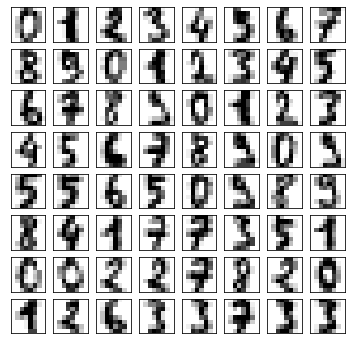

In [0]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
digits = load_digits()
print(digits.data.shape)     # digits는 (1797, 64) 데이터로 8*8 숫자 이미지다.
fig = plt.figure(figsize=(6, 6)) # figure size in inches
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
digits.data = scaler.transform(digits.data)
np.mean(digits.data[:,43]), np.std(digits.data[:,43])   # mean=0, std=1


(9.094314369773124e-17, 1.000000000000003)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64)
proj = pca.fit_transform(digits.data) # PCA Score 
proj.shape  # proj는 PCA를 통해 (1797,3) 데이터로 64개의 차원을 3차원으로 줄인 데이터다.


(1797, 64)

In [0]:
diag = np.diag(pca.explained_variance_)
diag

array([[7.34477606e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.83549054e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.15396118e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97430140e-31, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.90222011e-32, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.84266959e-32]])

In [0]:
np.sum(diag)

61.03396436525619

In [0]:
eVector = pca.components_

In [0]:
cov = np.dot(np.dot(eVector, diag), eVector.T)
cov

array([[ 1.29957210e+00, -9.14078178e-02,  1.41877356e-01, ...,
        -2.25437889e-16, -1.58758523e-16,  6.34062845e-18],
       [-9.14078178e-02,  8.55031581e-01, -2.35686048e-01, ...,
        -8.77890102e-17,  3.50021641e-17,  4.72659026e-18],
       [ 1.41877356e-01, -2.35686048e-01,  5.27086813e-01, ...,
         1.99259716e-16, -7.83384809e-18, -2.92409631e-17],
       ...,
       [-2.25437889e-16, -8.77890102e-17,  1.99259716e-16, ...,
         3.99082642e-01,  1.82528813e-03,  2.90956631e-33],
       [-1.58758523e-16,  3.50021641e-17, -7.83384809e-18, ...,
         1.82528813e-03,  2.58296665e-01,  3.85000566e-33],
       [ 6.34062845e-18,  4.72659026e-18, -2.92409631e-17, ...,
         2.90956631e-33,  3.85000566e-33,  7.34477606e+00]])

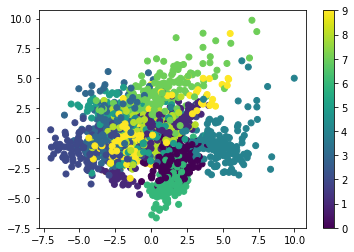

In [0]:
# 3차원으로 줄였어도 3차원 공간에서 점들이 군집화 되어 있어 
# 0~9까지의 숫자의 특징을 어느정도 보유하고 있음을 알 수 있다. 
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target)
plt.colorbar()

# Noise Reduction

<img src='https://i.postimg.cc/QNwGVN8M/image.png' width='100%'>

In [0]:
# Mnist_AE_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


11493376/11490434 [==============================] - 0s 0us/step


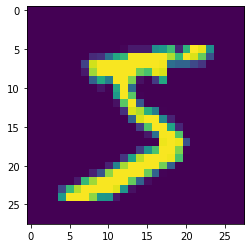

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape(28,28))
plt.show()

In [0]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

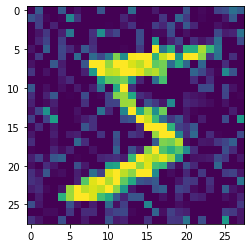

In [0]:
plt.imshow(train_images_noisy[0].reshape(28,28))
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=784))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))      # 모든 값들을 0~1 사이로 맞춰주기 위함
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(train_images_noisy, train_images_noisy,
                epochs=50,
                batch_size=100,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/50
600/600 - 1s - loss: 0.3607
Epoch 2/50
600/600 - 1s - loss: 0.3400
Epoch 3/50
600/600 - 1s - loss: 0.3375
Epoch 4/50
600/600 - 1s - loss: 0.3364
Epoch 5/50
600/600 - 1s - loss: 0.3357
Epoch 6/50
600/600 - 1s - loss: 0.3350
Epoch 7/50
600/600 - 1s - loss: 0.3347
Epoch 8/50
600/600 - 1s - loss: 0.3343
Epoch 9/50
600/600 - 1s - loss: 0.3340
Epoch 10/50
600/600 - 1s - loss: 0.3338
Epoch 11/50
600/600 - 1s - loss: 0.3337
Epoch 12/50
600/600 - 1s - loss: 0.3336
Epoch 13/50
600/600 - 1s - loss: 0.3333
Epoch 14/50
600/600 - 1s - loss: 0.3332
Epoch 15/50
600/600 - 1s - loss: 0.3331
Epoch 16/50
600/600 - 1s - loss: 0.3330
Epoch 17/50
600/600 - 1s - loss: 0.3330
Epoch 18/50
600/600 - 1s - loss: 0.3329
Epoch 19/50
600/600 - 1s - loss: 0.3328
Epoch 20/50
600/600 - 1s - loss: 0.3327
Epoch 21/50
600/600 - 1s - loss: 0.3326
Epoch 22/50
600/600 - 1s - loss: 0.3326
Epoch 23/50
600/600 - 1s - loss: 0.3325
Epoch 24/50
600/600 - 1s - loss: 0.3326
Epoch 25/50
600/600 - 1s - loss: 0.3323
Epoch 26/

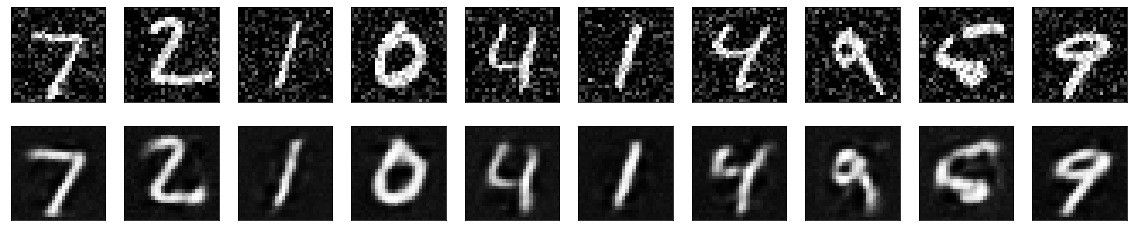

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [0]:
# Mnist_AE_CNN_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0


In [0]:
noise_factor = 0.2
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

In [0]:
model = models.Sequential()
# (B, 28, 28, 1)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# (B, 28, 28, 32)
model.add(layers.MaxPooling2D((2, 2), padding='same'))
# (B, 14, 14, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 32)
model.add(layers.MaxPooling2D((2, 2), padding='same'))
# (B, 7, 7, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 7, 7, 32)
model.add(layers.UpSampling2D((2, 2)))
# (B, 14, 14, 32)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# (B, 14, 14, 32)
model.add(layers.UpSampling2D((2, 2)))
# (B, 28, 28, 32)
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
# (B, 28, 28, 1)

model.summary()

model.compile(optimizer='adadelta', loss='binary_crossentropy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)       

In [0]:
model.fit(train_images_noisy, train_images_noisy,
                epochs=100,
                batch_size=128,
                shuffle=True,
                verbose = 2)

decoded_imgs = model.predict(test_images_noisy)

Epoch 1/100
469/469 - 2s - loss: 0.6820
Epoch 2/100
469/469 - 2s - loss: 0.6596
Epoch 3/100
469/469 - 2s - loss: 0.6194
Epoch 4/100
469/469 - 2s - loss: 0.5880
Epoch 5/100
469/469 - 2s - loss: 0.5744
Epoch 6/100
469/469 - 2s - loss: 0.5639
Epoch 7/100
469/469 - 2s - loss: 0.5524
Epoch 8/100
469/469 - 2s - loss: 0.5390
Epoch 9/100
469/469 - 2s - loss: 0.5223
Epoch 10/100
469/469 - 2s - loss: 0.5013
Epoch 11/100
469/469 - 2s - loss: 0.4761
Epoch 12/100
469/469 - 2s - loss: 0.4496
Epoch 13/100
469/469 - 2s - loss: 0.4266
Epoch 14/100
469/469 - 2s - loss: 0.4109
Epoch 15/100
469/469 - 2s - loss: 0.4016
Epoch 16/100
469/469 - 2s - loss: 0.3959
Epoch 17/100
469/469 - 2s - loss: 0.3921
Epoch 18/100
469/469 - 2s - loss: 0.3891
Epoch 19/100
469/469 - 2s - loss: 0.3866
Epoch 20/100
469/469 - 2s - loss: 0.3844
Epoch 21/100
469/469 - 2s - loss: 0.3824
Epoch 22/100
469/469 - 2s - loss: 0.3807
Epoch 23/100
469/469 - 2s - loss: 0.3791
Epoch 24/100
469/469 - 2s - loss: 0.3777
Epoch 25/100
469/469 - 2s

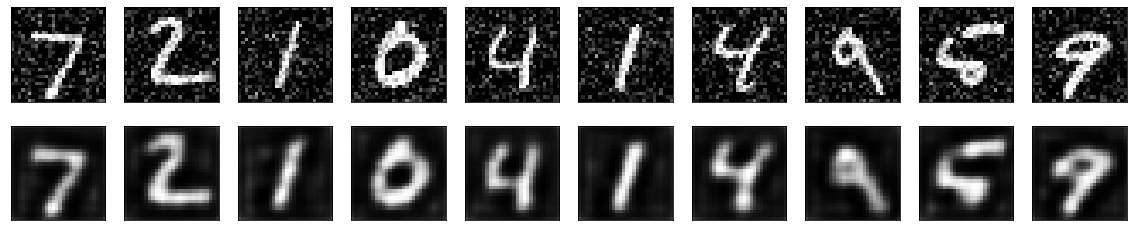

In [0]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Anomaly Detection

<img src='https://i.postimg.cc/QN28wJWS/image.png' width='100%'>

In [0]:
# AnomalyDetection_Mnist_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
(train_images, _), (test_images, _) = datasets.mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=784))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(784, activation='sigmoid'))
model.summary()
adam = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy')
model.fit(train_images, train_images,
                epochs=15,
                batch_size=32,
                shuffle=True,
                verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1875/1875 - 3s - loss: 0.1289
Epoch 2/15
1875/1875 - 3s - loss: 0.1093
Epoch 3/15
1875/1875 - 3s - loss: 0.1072
Epoch 4/15
1875/1875 - 3s - loss: 0.1059
Epoch 5/15
1875/1875 - 3s - loss: 0.1055
Epoch 6/15
1875/1875 - 3s - loss: 0.1051


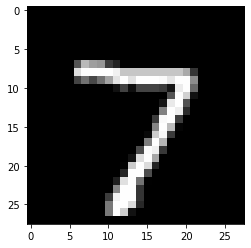

In [0]:
original = test_images[0].reshape(28,28)
plt.imshow(original)
plt.gray()

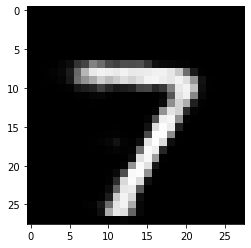

In [0]:
decoded = model.predict(test_images[0].reshape(1,784))
decoded = decoded.reshape(28,28)
plt.imshow(decoded)
plt.gray()

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


(1, 784)


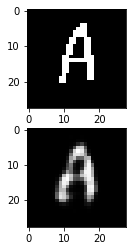

In [0]:
filename = '/gdrive/My Drive/University Lecture/데이터마이닝/Images/a.png'
image = mpimg.imread(filename)
image = image[:,:,0]
image = (np.where(image == 0, 1, 0))
image = image.flatten()
image = image.reshape(1,784)
aeResult = model.predict(image)
print(aeResult.shape)
arr1 = np.array(image)
arr2 = np.array(aeResult)
arr1.shape=(28,28)
arr2.shape=(28,28)
plt.subplot(211)
plt.imshow(arr1)
plt.subplot(212)
plt.imshow(arr2)
plt.show()

In [0]:
np.corrcoef(image.reshape(784), aeResult.reshape(784))  # A

array([[1.        , 0.84977713],
       [0.84977713, 1.        ]])

In [0]:
np.corrcoef(test_images[0], decoded.reshape(784))       # 7

array([[1.       , 0.9616785],
       [0.9616785, 1.       ]])

# Colorization

<img src='https://i.postimg.cc/XqfYQrxn/image.png' width='100%'>

In [0]:
# Colorization_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.io import imsave

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
X = np.load('/gdrive/My Drive/University Lecture/데이터마이닝/Images/X.npy') # numpy array, gray Image
Y = np.load('/gdrive/My Drive/University Lecture/데이터마이닝/Images/Y.npy') # color Image
test_X = np.load('/gdrive/My Drive/University Lecture/데이터마이닝/Images/test_X.npy' ) # gray Image

print( X.shape ,Y.shape )
print( test_X.shape )

(190, 64, 64, 1) (190, 64, 64, 3)
(9, 64, 64, 1)


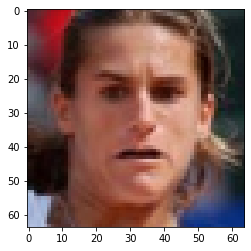

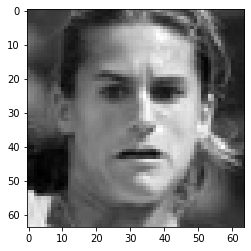

In [0]:
from matplotlib import pyplot as plt
plt.imshow(Y[0])
plt.show()
plt.imshow(X[0].reshape((64,64)), cmap='gray')
plt.show()

In [0]:
dropout_rate = 0.5
DIMEN = 64
kernel_size = ( 4 , 4 )

NEURAL_SCHEMA = [
    layers.Conv2D( 32 , input_shape=( DIMEN , DIMEN , 1 ) , kernel_size=kernel_size , strides=1,activation='relu'),
    layers.Dropout( dropout_rate ) ,
    layers.Conv2D( 64, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2D( 128, kernel_size=kernel_size, strides=1, activation='relu') ,
    layers.Dropout(dropout_rate),
    layers.Conv2D( 256, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation='relu'),
    layers.Dropout(dropout_rate),
    layers.Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation='tanh' ),
]

model = tf.keras.Sequential( NEURAL_SCHEMA )
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 61, 61, 32)        544       
_________________________________________________________________
dropout_7 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 64)        32832     
_________________________________________________________________
dropout_8 (Dropout)          (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 55, 55, 128)       131200    
_________________________________________________________________
dropout_9 (Dropout)          (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 256)      

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss='binary_crossentropy', metrics=['mae'])
model.fit(X,Y, batch_size=16, epochs=500,verbose = 2)
model.save("colorModel.h5")

Epoch 1/500
12/12 - 0s - loss: 4.1683 - mae: 0.4407
Epoch 2/500
12/12 - 0s - loss: 2.6876 - mae: 0.3510
Epoch 3/500
12/12 - 0s - loss: 2.0040 - mae: 0.3077
Epoch 4/500
12/12 - 0s - loss: 1.6175 - mae: 0.2843
Epoch 5/500
12/12 - 0s - loss: 1.3763 - mae: 0.2676
Epoch 6/500
12/12 - 0s - loss: 1.2218 - mae: 0.2525
Epoch 7/500
12/12 - 0s - loss: 1.1100 - mae: 0.2413
Epoch 8/500
12/12 - 0s - loss: 1.0303 - mae: 0.2364
Epoch 9/500
12/12 - 0s - loss: 0.9798 - mae: 0.2329
Epoch 10/500
12/12 - 0s - loss: 0.9420 - mae: 0.2300
Epoch 11/500
12/12 - 0s - loss: 0.9181 - mae: 0.2323
Epoch 12/500
12/12 - 0s - loss: 0.8918 - mae: 0.2258
Epoch 13/500
12/12 - 0s - loss: 0.8665 - mae: 0.2189
Epoch 14/500
12/12 - 0s - loss: 0.8510 - mae: 0.2150
Epoch 15/500
12/12 - 0s - loss: 0.8392 - mae: 0.2128
Epoch 16/500
12/12 - 0s - loss: 0.8296 - mae: 0.2120
Epoch 17/500
12/12 - 0s - loss: 0.8199 - mae: 0.2129
Epoch 18/500
12/12 - 0s - loss: 0.8122 - mae: 0.2111
Epoch 19/500
12/12 - 0s - loss: 0.8048 - mae: 0.2085
Ep

In [0]:
img_array = np.load('/gdrive/My Drive/University Lecture/데이터마이닝/Images/test_X.npy')
for i in range(9):
    img = img_array[i,:,:,:]
    img = img.reshape(64,64)
    imsave('/gdrive/My Drive/University Lecture/데이터마이닝/Images/test_X'+str(i)+'.png', img)

values = model.predict( test_X )

for i in range( 9 ):
    image_final = ( values[i] * 255).astype( np.uint8 )
    imsave( '/gdrive/My Drive/University Lecture/데이터마이닝/Images/'+'{}.png'.format( i + 1 ) , image_final  )

# img_array = np.load('/gdrive/My Drive/DeepLearning/AE/X.npy')
# print(img_array.shape)
# for i in range(6):
#     img = img_array[i,:,:,:]
#     img = img.reshape(64,64)
#     imsave('/gdrive/My Drive/DeepLearning/AE/X'+str(i)+'.png', img)

# img_array = np.load('/gdrive/My Drive/DeepLearning/AE/Y.npy')
# print(img_array.shape)
# for i in range(6):
#     img = img_array[i,:,:,:]
#     img = img.reshape(64,64,3)
#     imsave('/gdrive/My Drive/DeepLearning/AE/Y'+str(i)+'.png', img)

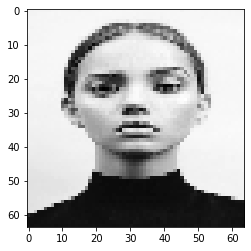

In [0]:
import matplotlib.pyplot as plt

gray_img = plt.imread('/gdrive/My Drive/University Lecture/데이터마이닝/Images/test_X0.png')
color_img = plt.imread('/gdrive/My Drive/University Lecture/데이터마이닝/Images/1.png')
plt.imshow(gray_img)

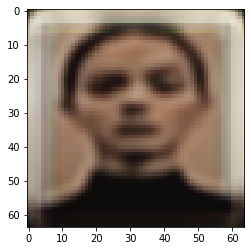

In [0]:
plt.imshow(color_img)

# Image Search

<img src='https://i.postimg.cc/Y2XxN8jn/image.png' width='100%'>

In [0]:
# ImageSearch_CIFAR10_AE_TF2.ipynb

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets 
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
X_train = np.reshape(X_train, (-1, 32, 32, 3))
X_test = np.reshape(X_test, (-1, 32, 32, 3))

num_classes = 10
batch_size = 32
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [0]:
# Functional API

input_img = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same', name='encoder')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

autoencoder.fit(X_train, X_train, epochs=5, batch_size=32, callbacks=None )

autoencoder.save('autoencoder.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
encoder (MaxPooling2D)       (None, 4, 4, 8)           0     

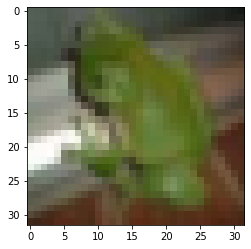

In [0]:
encoder = models.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)
encoder.save('encoder.h5')
query = X_test[7]
plt.imshow(query.reshape(32,32,3))

In [0]:
X_test = np.delete(X_test, 7, axis=0)   # 찾으려는 사진을 제거하고 수행
print(X_test.shape)

(9999, 32, 32, 3)


In [0]:
codes = encoder.predict(X_test)
query_code = encoder.predict(query.reshape(1,32, 32, 3))

In [0]:
from sklearn.neighbors import NearestNeighbors
n_neigh = 5

codes = codes.reshape(-1, 4*4*8); print(codes.shape)
query_code = query_code.reshape(1, 4*4*8); print(query_code.shape)

"""### Fit the KNN to the test set"""

nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(codes)

distances, indices = nbrs.kneighbors(np.array(query_code))

closest_images = X_test[indices]

closest_images = closest_images.reshape(-1,32, 32, 3); print(closest_images.shape)

(9999, 128)
(1, 128)
(5, 32, 32, 3)


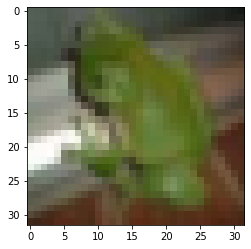

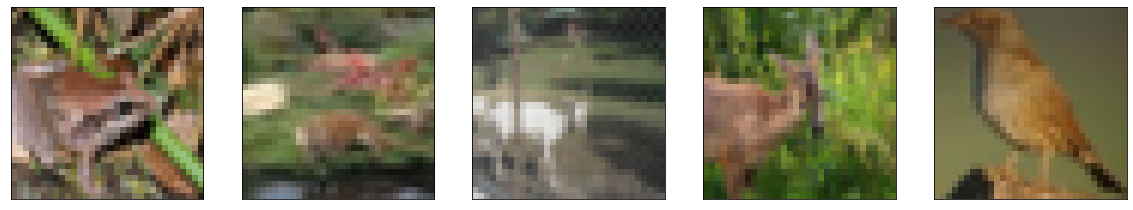

In [0]:
plt.imshow(query.reshape(32, 32, 3))

plt.figure(figsize=(20, 6))
for i in range(n_neigh):
    # display original
    ax = plt.subplot(1, n_neigh, i+1)
    plt.imshow(closest_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Question

1. 오토인코더에 설명으로 틀린 것은?
 * supervised learning 이다. --> 틀린 설명
 * unsupervised learning이다. --> 맞는 설명

2. 오토인코더의 응용분야가 아닌것은?
 * Colorization --> 응용분야 O
 * Image Search --> 응용분야 0
 * Image 확대 --> 응용분야 X